**A clasic dataset used for flower classification**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for better visualization
data = pd.DataFrame(X, columns=feature_names)
data['species'] = [iris.target_names[i] for i in y]
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**SPLIT THE DATA AND CHECK ACCURACY**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

#Make Prediction
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy:.2f}")
print("\n🗒️ Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


 Accuracy: 1.00

🗒️ Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**STEP 3 **

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


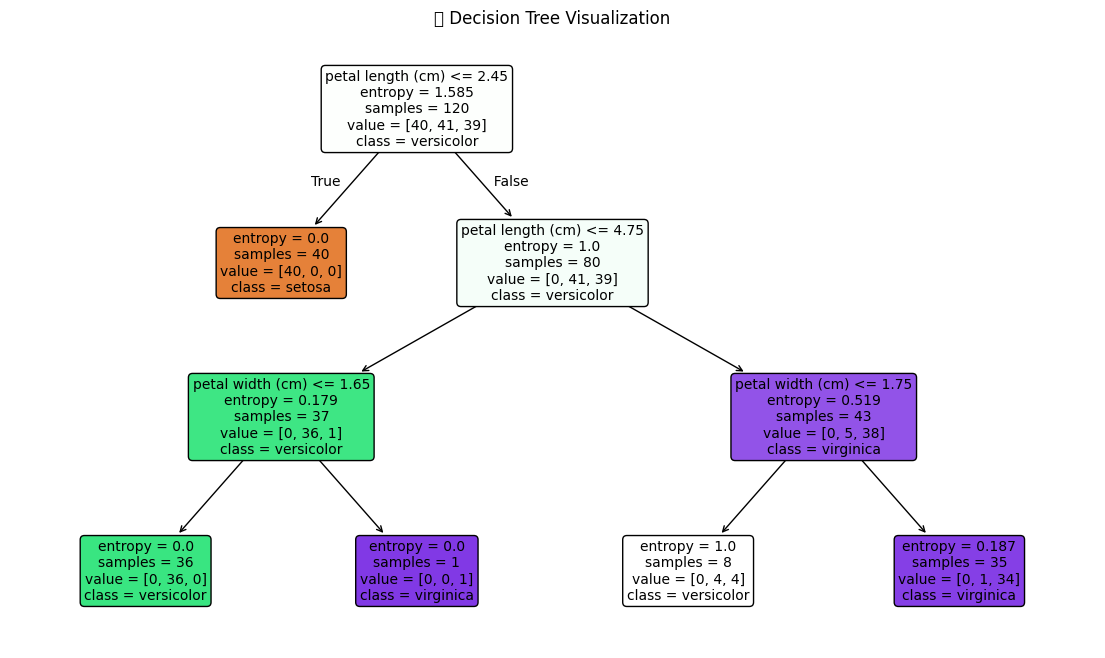

In [11]:
# Visualize Decision Tree
plt.figure(figsize=(14,8))
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("🌳 Decision Tree Visualization")
plt.show()

LETS TRY A NEW FLOWER SAMPLE

In [12]:
# Predict a new flower sample
sample = np.array([[5.0, 3.6, 1.4, 0.2]]) # Example input (sepa1/peta1 measurements)
prediction = model.predict(sample)
print(f"\n Predicted Spices for sample {sample.tolist()}: {iris.target_names[prediction][0]}")



 Predicted Spices for sample [[5.0, 3.6, 1.4, 0.2]]: setosa
